<a href="https://colab.research.google.com/github/Hsenheib/-Project.-Path-MySQL-/blob/main/Copy_of_Smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# חלק א


In [28]:
from google.colab import files
uploaded = files.upload()


Saving smoking.csv to smoking (1).csv


In [ ]:
import pandas as pd

# קריאת הקובץ שהעלית
df = pd.read_csv('smoking.csv')

# מידע כללי על הדאטה
df.info()

# תצוגה של 5 השורות הראשונות
df.head()


#חלק ב


In [ ]:
# מחיקת העמודה Unnamed: 0 (מספר שורה)
df_clean.drop(columns=['Unnamed: 0'], inplace=True)


In [ ]:
# מבנה הנתונים
df_clean.info()

# תצוגת 5 שורות ראשונות
df_clean.head()


In [ ]:
# בדיקת כפילויות
print("כפילויות:", df_clean.duplicated().sum())

# מחיקת כפילויות (אם יש)
df_clean.drop_duplicates(inplace=True)


In [ ]:
# מחיקת עמודות עם ערכים חסרים מרובים (אם הן קיימות) –
# זאת כדי לנקות את הדאטה ולהשאיר רק עמודות רלוונטיות לניתוח
columns_to_drop = ['amt_weekends', 'amt_weekdays', 'type']
df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])


In [ ]:
df_clean.info()


In [ ]:
# גילאים מתחת ל-18 או מעל 67 נחשבים חריגים
outliers = df_clean[(df_clean['age'] < 18) | (df_clean['age'] >67)]
print("מספר ערכים חריגים בגיל:", len(outliers))


In [ ]:
# קידוד עמודת smoke ל-1 (Yes) ו-0 (No)
df_clean['smoke_encoded'] = df_clean['smoke'].map({'Yes': 1, 'No': 0})


In [ ]:
# נרמול גיל לפי Z-Score
df_clean['age_normalized'] = (df_clean['age'] - df_clean['age'].mean()) / df_clean['age'].std()


In [ ]:
# גרף עמודות – התפלגות עישון לפי מין
# כותרת בעברית: התפלגות עישון לפי מין
plt.figure()
sns.countplot(data=df_clean, x='gender', hue='smoke')
plt.title("Smoking Distribution by Gender")  # כותרת באנגלית
plt.xlabel("Gender")
plt.ylabel("Number of People")
plt.tight_layout()
plt.show()


In [ ]:
# ייבוא ספריות
import seaborn as sns
import matplotlib.pyplot as plt

# ציור boxplot של גיל לפי סטטוס עישון
# כותרת בעברית: התפלגות הגיל לפי סטטוס עישון
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_clean, x='smoke', y='age')
plt.title("Age Distribution by Smoking Status")  # כותרת באנגלית
plt.xlabel("Smoking Status")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


In [ ]:
# גרף עמודות – רמת השכלה מול עישון
# כותרת בעברית: רמת השכלה מול עישון
plt.figure(figsize=(10, 4))
sns.countplot(data=df_clean, y='highest_qualification', hue='smoke')
plt.title("Smoking Status by Education Level")  # כותרת באנגלית
plt.xlabel("Number of People")
plt.ylabel("Education Level")
plt.tight_layout()
plt.show()


In [ ]:
print("העמודות שנותרו לניתוח:")
print(df_clean.columns)


#חלק ג


In [ ]:
# ייבוא ספריות נדרשות
import seaborn as sns
import matplotlib.pyplot as plt

# סינון עמודות מספריות בלבד
numeric_features = df_clean.select_dtypes(include=['int64', 'float64'])

# יצירת מטריצת קורלציה
correlation_matrix = numeric_features.corr()

# ציור מפת קורלציה
plt.figure(figsize=(10, 6))

# הצגת מפת קורלציה בין משתנים מספריים
# כותרת באנגלית לפי דרישת הפרויקט
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap Between Numerical Features")
plt.show()

# חישוב ממוצע קורלציה לכל עמודה
mean_correlation_per_column = correlation_matrix.abs().mean()
print("ממוצע קורלציה לכל משתנה:")
print(mean_correlation_per_column)

# מציאת זוגות עם קורלציה גבוהה (|corr| > 0.9)
highly_correlated_pairs = []
for col in correlation_matrix.columns:
    for other_col in correlation_matrix.columns:
        if col != other_col:
            corr_val = correlation_matrix.loc[col, other_col]
            if abs(corr_val) > 0.9:
                pair = tuple(sorted([col, other_col]))
                if pair not in highly_correlated_pairs:
                    highly_correlated_pairs.append(pair)

print("\nזוגות משתנים עם קורלציה גבוהה (>|0.9|):")
for pair in highly_correlated_pairs:
    print(pair)


In [ ]:
# 1. # חלוקת גיל לקבוצות: 18–25, 26–35, 36–45, 46–55, 56–67
df_clean['age_group'] = pd.cut(df_clean['age'],
                               bins=[17, 25, 35, 45, 55, 67],  # גבולות הקבוצות
                               labels=['18–25', '26–35', '36–45', '46–55', '56–67'],
                               right=True,         # כולל את הקצה הימני (למשל 25 כלול בקבוצה של 18–25)
                               include_lowest=True)  # כולל גם את הערך הנמוך ביותר (18)

# בדיקה: כמה אנשים בכל קבוצת גיל?
print(df_clean['age_group'].value_counts().sort_index())

# 2. income_level – זיהוי רמת הכנסה
df_clean['income_level'] = df_clean['gross_income'].apply(
    lambda x: 'low' if 'Under' in x else ('mid' if '2,600' in x else 'high'))

# 3. is_academic – האם בעל תואר אקדמי
df_clean['is_academic'] = df_clean['highest_qualification'].str.contains('Degree|Post', case=False, na=False)

# 4. marital_encoded – קידוד מצב משפחתי (נשוי = 1, אחר = 0)
df_clean['marital_encoded'] = df_clean['marital_status'].apply(lambda x: 1 if x == 'Married' else 0)

# 5. region_dummies – עמודות דמי לפי אזור מגורים
region_dummies = pd.get_dummies(df_clean['region'], prefix='region')
df_clean = pd.concat([df_clean, region_dummies], axis=1)

# הצגת הפיצ'רים החדשים לדוגמה
df_clean[['age', 'age_group', 'gross_income', 'income_level',
          'highest_qualification', 'is_academic',
          'marital_status', 'marital_encoded'] + list(region_dummies.columns)].head()


#חלק ד


In [29]:
# ייבוא ספריות בסיסיות
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# נניח ש-df_clean הוא הקובץ שלך אחרי ניקוי ו-EDA
df_encoded = pd.get_dummies(df_clean, drop_first=True)  # קידוד One-Hot של עמודות טקסט

# קידוד משתנה המטרה 'smoke'
df_encoded['smoke_encoded'] = df_clean['smoke'].map({'no': 0, 'yes': 1})

# יצירת משתני X (תכונות) ו-y (מטרה)
X = df_encoded.drop('smoke_encoded', axis=1)
y = df_encoded['smoke_encoded']


In [14]:
# שלב 2 – חלוקת הנתונים לסט אימון וסט מבחן
from sklearn.model_selection import train_test_split

# מחלקים את הנתונים: 80% אימון, 20% מבחן
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# הדפסת צורת המטריצות לבדיקה
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (1352, 47)
Test set shape: (339, 47)


In [48]:
# שלב ביניים – ניקוי ערכים חסרים מ-y_train
# ניפטר משורות שבהן y_train הוא NaN וגם מהשורות המתאימות ב-X_train

# מאחדים את X ו-y לפני הניקוי
train_data = pd.concat([X_train, y_train], axis=1)

# מסירים שורות עם ערכים חסרים
train_data = train_data.dropna()

# מפרידים חזרה ל-X ול-y
X_train = train_data.drop('smoke_encoded', axis=1)
y_train = train_data['smoke_encoded']


TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

In [30]:
print(df_clean.shape)
df_clean.head()


(1691, 13)


,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,smoke_encoded
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,0
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,1
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN,0
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN,0
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,0


In [31]:
# ניצור עותק ונדרוס את הקידוד של העמודות הקטגוריות
df_encoded = pd.get_dummies(df_clean, drop_first=True)


In [32]:
X = df_encoded.drop('smoke_encoded', axis=1)
y = df_encoded['smoke_encoded']


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [47]:
print("Train Accuracy:", model.score(X_train, y_train))
print("Test Accuracy:", model.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.9970501474926253


In [36]:
y.value_counts(normalize=True)


,proportion
smoke_encoded,
0,0.751035
1,0.248965


In [46]:
from imblearn.over_sampling import SMOTE

# יצירת מאזן על סט האימון בלבד
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# בודקים את הגודל החדש
print("Balanced X shape:", X_train_balanced.shape)
print("Balanced y distribution:\n", y_train_balanced.value_counts())


Balanced X shape: (2024, 46)
Balanced y distribution:
 smoke_encoded
0    1012
1    1012
Name: count, dtype: int64


In [45]:
# יצירת המודל מחדש
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

# אימון על הסט המאוזן
model.fit(X_train_balanced, y_train_balanced)

# דיוק על סט האימון
train_acc = model.score(X_train_balanced, y_train_balanced)

# דיוק על סט המבחן (הלא מאוזן)
test_acc = model.score(X_test, y_test)

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")


Train Accuracy: 1.000
Test Accuracy: 0.997


In [37]:
print('smoke_encoded' in X_train.columns)


False


דו"ח סיווג על סט האימון:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       340

    accuracy                           1.00      1352
   macro avg       1.00      1.00      1.00      1352
weighted avg       1.00      1.00      1.00      1352

דו"ח סיווג על סט המבחן:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      0.99      0.99        81

    accuracy                           1.00       339
   macro avg       1.00      0.99      1.00       339
weighted avg       1.00      1.00      1.00       339



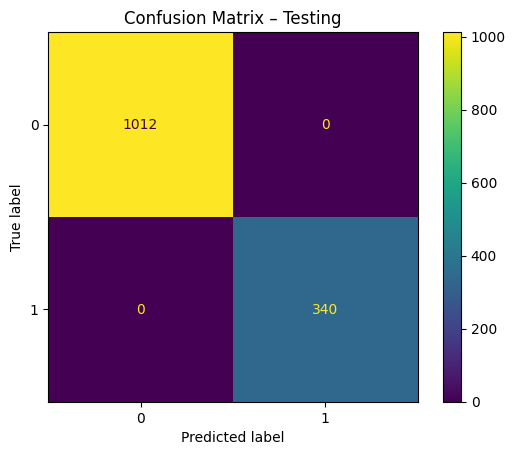

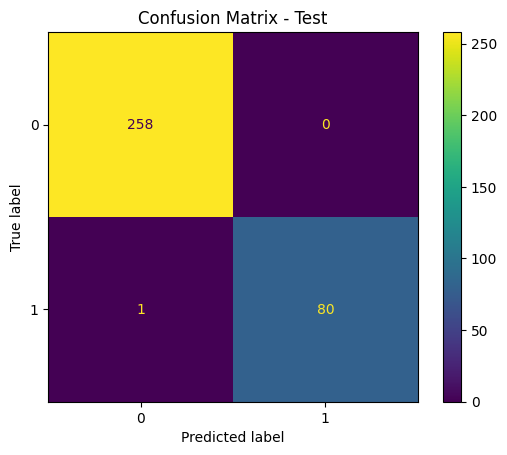

DecisionTreeClassifier(random_state=42)


In [44]:
# ייבוא של כלים להערכת ביצועים
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# שלב 1 – תחזית על סט האימון וסט המבחן
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# שלב 2 – הצגת דוחות סיווג
print("דו\"ח סיווג על סט האימון:\n")
print(classification_report(y_train, y_train_pred))

print("דו\"ח סיווג על סט המבחן:\n")
print(classification_report(y_test, y_test_pred))

# שלב 3 – מטריצת בלבול לסט האימון
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train)
disp_train.plot()
plt.title("Confusion Matrix – Testing")

plt.show()

# שלב 4 – מטריצת בלבול לסט המבחן
cm_test = confusion_matrix(y_test, y_test_pred)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test)
disp_test.plot()
plt.title("Confusion Matrix - Test")
plt.show()
print(model)



In [ ]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0


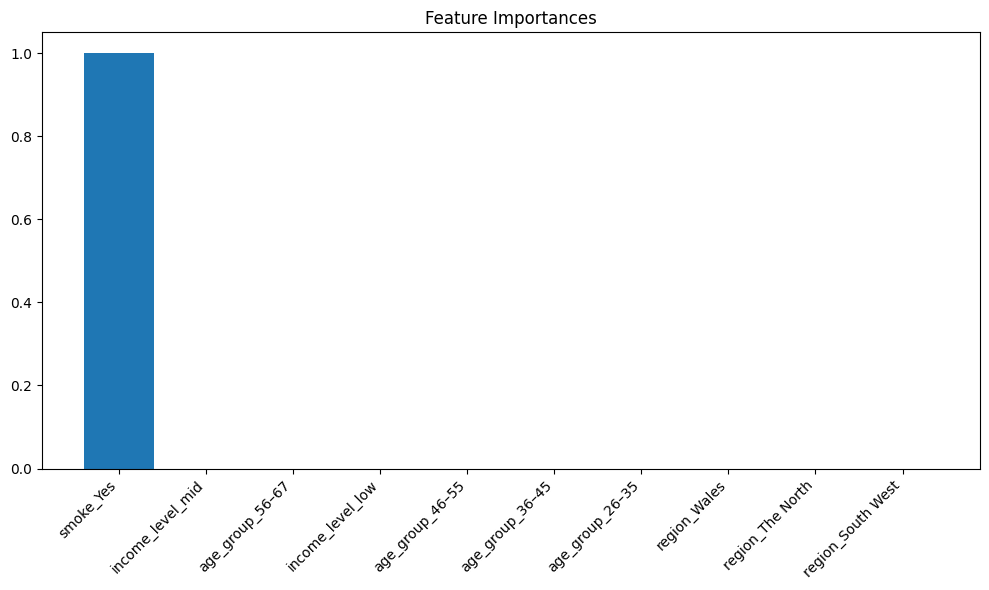

In [ ]:
# מודל שכבר עבר fit על הנתונים המאוזנים
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(10), importances[indices[:10]], align='center')
plt.xticks(range(10), features[indices[:10]], rotation=45, ha='right')
plt.tight_layout()
plt.show()


#חלק ה

דו"ח סיווג:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       258
           1       1.00      0.95      0.97        81

    accuracy                           0.99       339
   macro avg       0.99      0.98      0.98       339
weighted avg       0.99      0.99      0.99       339



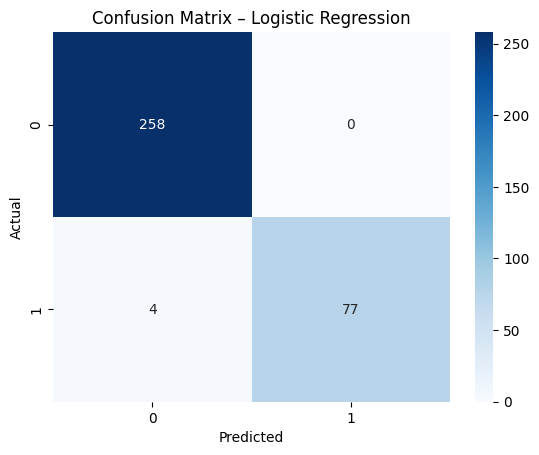

LogisticRegression()


In [42]:
# ייבוא ספריות
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# קריאת הנתונים
df = pd.read_csv('smoking.csv')

# עותק נקי
df_clean = df.copy()

# מחיקת עמודה מיותרת
if 'Unnamed: 0' in df_clean.columns:
    df_clean.drop(columns=['Unnamed: 0'], inplace=True)

# קידוד עמודת המטרה
df_clean['smoke_encoded'] = df_clean['smoke'].map({'Yes': 1, 'No': 0})

# משתני X ו־y
X = df_clean.drop(columns=['smoke', 'smoke_encoded'])
y = df_clean['smoke_encoded']

# קידוד One-Hot
X = pd.get_dummies(X, drop_first=True)

# מילוי ערכים חסרים (אם יש)
X = X.fillna(X.mean())

# נרמול
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# פיצול לסט אימון וסט בדיקה
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# בניית מודל רגרסיה לוגיסטית
model = LogisticRegression()
model.fit(X_train, y_train)

# תחזיות
y_pred = model.predict(X_test)

# הדפסת ביצועים
print("דו\"ח סיווג:")
print(classification_report(y_test, y_pred))

# מטריצת בלבול
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

print(model)

